In [ ]:
# import pandas as pd

# df = pd.read_csv("../data/PEP.csv", header=None)
# print(df.head(10))


            0                   1                   2                   3  \
0   timestamp               Close                High                 Low   
1         NaN                 PEP                 PEP                 PEP   
2  2020-01-02  115.33773803710938  116.53509383395686  114.76027836407754   
3  2020-01-03   115.1763916015625   116.1614485490243   114.7517938449633   
4  2020-01-06  115.61797332763672  115.76234797937617  114.81124011612654   
5  2020-01-07  113.80066680908203  115.55002015482418  113.74971716013971   
6  2020-01-08  114.38660430908203  114.94707631688215  113.85162008135643   
7  2020-01-09  114.46305847167969  114.96409367646936  114.24227230118777   
8  2020-01-10  114.24226379394531  114.99804723236986  114.12337694827272   
9  2020-01-13  115.94064331054688   115.9915929597274  114.32717728392947   

                    4        5  
0                Open   Volume  
1                 PEP      PEP  
2  116.22938293827997  3784100  
3  115.0320299192421

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.engine import PairsTradingEngine

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("talk")

from src.engine import PairsTradingEngine

engine = PairsTradingEngine(data_dir="../data/", lookback=60)
prices = engine.get_price_data()
prices.tail()


c:\Users\sriha\Downloads\resume\pairs-trading\src\engine.py:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined.fillna(method="ffill", inplace=True)


,COP,CVX,JNJ,KO,PEP,PG,WMT,XOM
timestamp,,,,,,,,
2024-12-23,94.797394,139.700027,142.891403,61.485874,148.336456,166.056046,89.885246,104.396103
2024-12-24,95.515411,140.550125,143.461914,61.939281,149.826782,166.875900,92.203255,104.494308
2024-12-26,95.299026,140.686920,143.196320,61.673145,149.464020,168.081009,92.312691,104.582695
2024-12-27,95.328529,140.706467,142.675018,61.554871,149.905228,167.458694,91.188515,104.572876
2024-12-30,95.495735,139.797745,140.992996,61.140888,148.758087,165.048508,90.104111,103.865776


In [ ]:
cointegrated = engine.find_cointegrated_pairs(pvalue_threshold=0.05)
print(f"Found {len(cointegrated)} cointegrated pairs:")
for pair in cointegrated:
    print(f"- {pair[0]} & {pair[1]}")

x, y = cointegrated[0]
print(f"\nAnalyzing pair: {x} & {y}")

signals = engine.generate_signals(x, y)

signals[['spread', 'zscore', 'signal', 'position']].tail()


Found 10 cointegrated pairs:
- COP & CVX
- COP & JNJ
- COP & KO
- COP & PEP
- CVX & JNJ
- CVX & KO
- CVX & PEP
- KO & PG
- KO & XOM
- PEP & XOM

Analyzing pair: COP & CVX


c:\Users\sriha\Downloads\resume\pairs-trading\src\engine.py:136: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  zdf['position'] = zdf['signal'].replace(to_replace=0, method='ffill').fillna(0)


,spread,zscore,signal,position
timestamp,,,,
2024-12-23,40.612157,0.141486,0,-1
2024-12-24,40.711740,0.143064,0,-1
2024-12-26,41.074713,0.186917,0,-1
2024-12-27,41.063422,0.163476,0,-1
2024-12-30,39.979926,-0.063911,0,-1


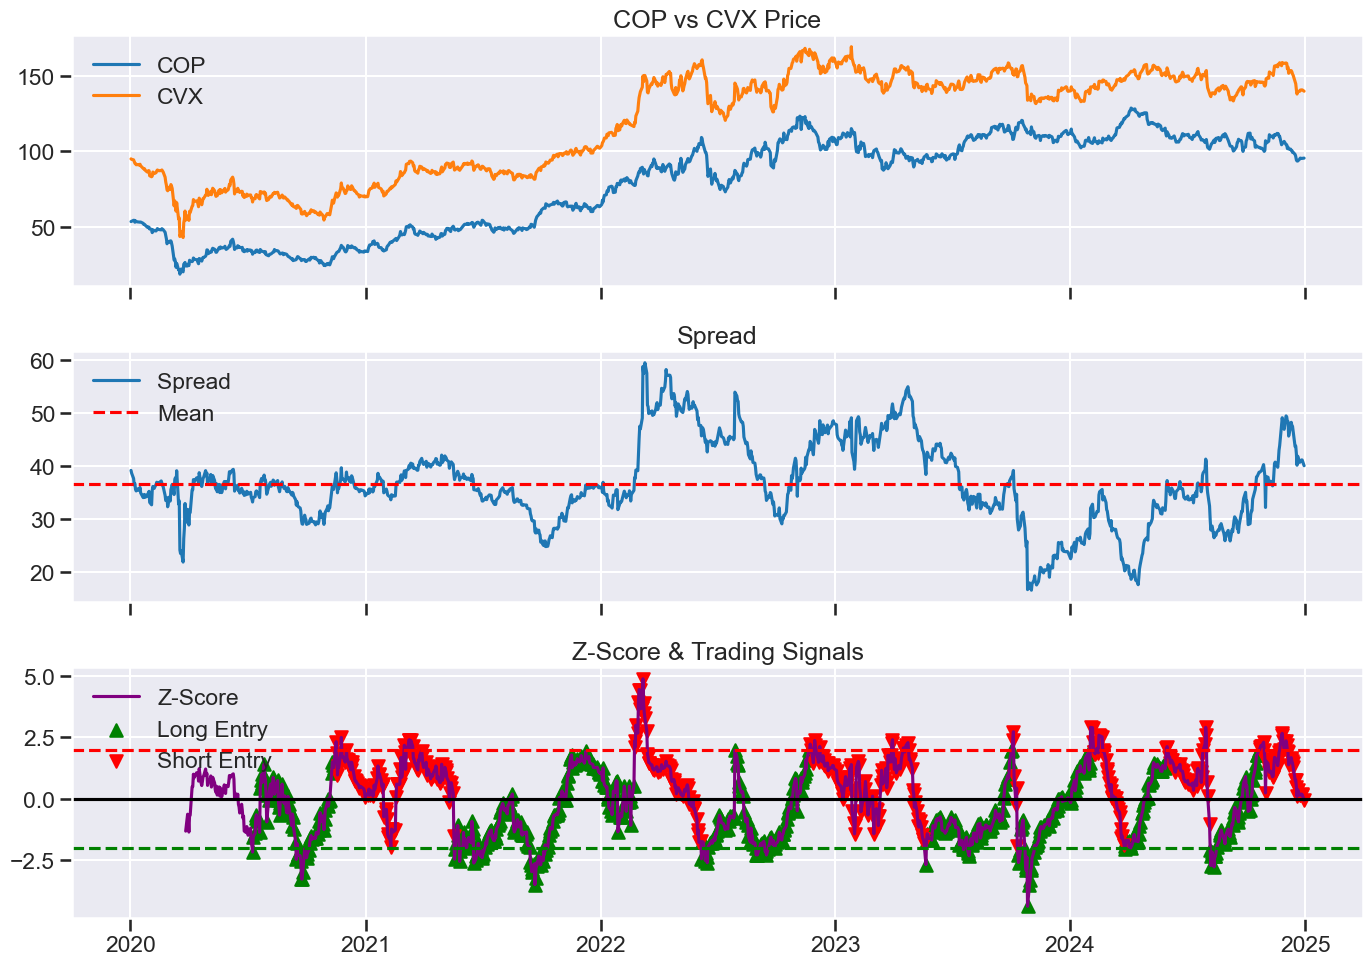

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

axs[0].plot(prices[x], label=x)
axs[0].plot(prices[y], label=y)
axs[0].set_title(f"{x} vs {y} Price")
axs[0].legend()

axs[1].plot(signals.index, signals["spread"], label="Spread")
axs[1].axhline(signals["spread"].mean(), color="red", linestyle="--", label="Mean")
axs[1].set_title("Spread")
axs[1].legend()

axs[2].plot(signals.index, signals["zscore"], label="Z-Score", color="purple")
axs[2].axhline(0, color="black")
axs[2].axhline(2, color="red", linestyle="--")
axs[2].axhline(-2, color="green", linestyle="--")

longs = signals[signals["position"] == 1]
shorts = signals[signals["position"] == -1]

axs[2].scatter(longs.index, longs["zscore"], label="Long Entry", marker="^", color="green")
axs[2].scatter(shorts.index, shorts["zscore"], label="Short Entry", marker="v", color="red")

axs[2].set_title("Z-Score & Trading Signals")
axs[2].legend()

plt.tight_layout()
plt.show()
